# SCS 3546: Deep Learning
> **Assignment 3: Contextualized Word Embeddings**

### Your name & student number:

<pre> Assal Nekoufar </pre>

<pre> X589579 </pre>

## **Assignment Description**
***

Search Engines are a standard tool for finding relevant content. The calculation of similarity between textual information is an important factor for better search results.

### **Objectives**

**Your goal in this assignment is to calculate the textual similarity between queries and the provided sample documents, using a variety of NLP approaches.**

In achieving the above goal, you will also:
- Demonstrate how to preprocess text and embed textual data.
- Compare the results of textual similarity scoring between traditional and deep-learning based NLP methods.

### **Data and Queries**

You will use the document repository provided by `sample_repository.json`, which you can download from the following link, or from the assignment description in Quercus: https://q.utoronto.ca/courses/286389/files/21993451/download?download_frd=1

The queries you will run against these sample documents are the following:

- Query 1: “fruits”
- Query 2: “vegetables”
- Query 3: “healthy foods in Canada”

### **Techniques to Demonstrate**

The techniques you will use to compute the similarity scores are:
- 1. TF-IDF.
- 2. Semantic similarity using GloVe word vectors.
- 3. Semantic similarity using a BERT-based model.


### **Feel Free to Choose Your Own Approach**

How you go about demonstrating each of the above techniques is up to you. You are not expected to use any particular library. The code below is just meant to provide you with some guidance to get started. You **do**, however, need to demonstrate obtaining similarity scores **with all 3 techniques above**, but how you go about doing this is totally up to you. The evaluation will be based on your ability obtain results using all three techniques, plus your discussion/comparison of any differences you observe.



## **Grade Allocation**
***
15 points total

- Experiment 1 (TD-IDF), implementation: 2 marks
- Experiment 2 (GloVe), implementation: 3 marks
- Experiment 3 (BERT), implementation: 3 marks
- Comparison and Discussion: 3 marks
  - Compare all three techniques and interpret your findings. Do your best to explain the differences you observe in terms of concepts learned in class (not just the _what_, but also the _how_ and _why_ one technique produces different results from another).
- Text Pre-Processing: 2 marks
 - Cleaning and standardization (e.g. lemmatization, stemming) in Experiment 1
 - Basic text cleaning (e.g. removal of special characters or tags) in Experiments 2 and 3.
- Clarity: 2 marks
 - The marks for clarity are awarded for code documentation, clean code (e.g. avoiding repetition by building re-usable functions)  and how well you explained/supported your answers, including the use of visualizations.


# Setup and Data Import
***
You can use the code snippets below to help you load and extract the document repository.


In [3]:
# you can either drop the file manually into your Colab drive, or otherwise
# use this widget to upload it

from google.colab import files
uploaded = files.upload()

Saving sample_repository.json to sample_repository.json


In [4]:
# this will unpack the json file contents into a list of titles and documents
import json

with open('sample_repository.json') as in_file:
    repo_data = json.load(in_file)

titles = [item[0] for item in repo_data['data']]
documents = [item[1] for item in repo_data['data']]

In [5]:
# let's take a look at some of these documents and titles;
# here we print the five last entries
for id in range(-5, 0, 1):
  print(f"Document title: {titles[id]}")
  print(f"Document contents: {documents[id]}")
  print("\n") # adds newline

Document title: botany
Document contents: Botany, also called plant science(s), plant biology or phytology, is the science of plant life and a branch of biology. A botanist, plant scientist or phytologist is a scientist who specialises in this field. 


Document title: Ford Bronco 
Document contents: The Ford Bronco is a model line of sport utility vehicles manufactured and marketed by Ford. ... The first SUV model developed by the company, five generations of the Bronco were sold from the 1966 to 1996 model years. A sixth generation of the model line is sold from the 2021 model year. the Ford Bronco will be available in Canada, with first deliveries beginning in spring of 2021. The Bronco will come in six versions in Canada: Base, Big Bend, Black Diamond, Outer Banks, Wildtrak and Badlands. 


Document title: List of fruit dishes
Document contents: Fruit dishes are those that use fruit as a primary ingredient. Condiments prepared with fruit as a primary ingredient are also included in

# Experiment 1: TF-IDF
***

**T**erm **F**requency - **I**nverse **D**ocument **F**requency (TF-IDF) is a traditional NLP technique to look at words that appear in both pieces of text, and score them based on how often they appear. For this experiment, you are free to use the TF-IDF implementation provided by scikit-learn.


In [6]:
# NLTK-related code removed and replaced with scikit-learn stop words.
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = 'english'
print('Using built-in English stop words from scikit-learn')

Using built-in English stop words from scikit-learn


In [7]:
#query = 'fruits'
# query  terms: 'fruits' / 'vegetables' / 'healthy foods in Canada'

# vectorizer = TfidfVectorizer(stop_words=stop_words)
# vectors = vectorizer.fit_transform([query] + documents)


# Calculate the word frequency, and a measure of similarity of the search terms with each document.
# Do not apply any text pre-processing (i.e. cleanup) yet.


# for each query, output the similarity scores for the top 5 documents with
# the highest score, and interpret your results


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [9]:
# our queries defined in the assignment
queries = [
    "fruits",
    "vegetables",
    "healthy foods in Canada"
]

In [10]:
def rank_documents_tfidf(queries, documents, stop_words="english", top_k=5):
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.metrics.pairwise import cosine_similarity
    import matplotlib.pyplot as plt

    # Vectorize
    vectorizer = TfidfVectorizer(stop_words=stop_words)
    tfidf_matrix = vectorizer.fit_transform(queries + documents)

    n_queries = len(queries)

    for i, q in enumerate(queries):
        q_vec = tfidf_matrix[i]
        doc_mat = tfidf_matrix[n_queries:]

        sims = cosine_similarity(q_vec, doc_mat)[0]
        doc_scores = list(enumerate(sims))
        doc_sorted = sorted(doc_scores, key=lambda x: x[1], reverse=True)

        print(f"\nQuery: {q}")
        for index, score in doc_sorted[:top_k]:
            print((index, round(score, 3)))
            print(documents[index], "\n")

        # Visualization
        indices = [idx for idx, _ in doc_sorted[:top_k]]
        scores = [score for _, score in doc_sorted[:top_k]]

        plt.figure(figsize=(7, 4))
        plt.bar(range(top_k), scores, color="skyblue")
        plt.xticks(range(top_k), indices)
        plt.xlabel("Document Index")
        plt.ylabel("Similarity Score")
        plt.title(f"Top {top_k} Similar Documents for Query: '{q}'")
        plt.ylim(0, 1)
        plt.show()



Query: fruits
(6, np.float64(0.165))
To a botanist, a fruit is an entity that develops from the fertilized ovary of a flower. This means that tomatoes, squash, pumpkins, cucumbers, peppers, eggplants, corn kernels, and bean and pea pods are all fruits; so are apples, pears, peaches, apricots, melons and mangos 

(10, np.float64(0.077))
Canada's Food Guide is a nutrition guide produced by Health Canada to promote Healthy behaviours and habits, and lifestyles in Canada - this is to increase the number of healthy people in Canada. In 2007, it was reported to be the second most requested Canadian government publication, behind the Income Tax Forms. The Health Canada website states: Food guides are basic education tools that are designed to help people follow a healthy diet. The Guide recommends eating a variety of healthy foods each day including plenty of vegetables and fruits, protein foods, and whole grain foods. It recommends choosing protein foods that come from plants more often. It

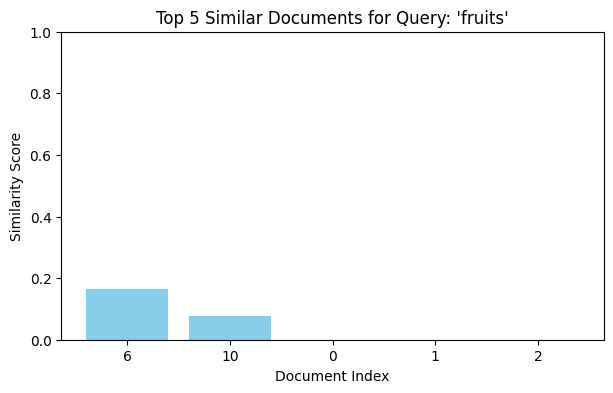


Query: vegetables
(10, np.float64(0.084))
Canada's Food Guide is a nutrition guide produced by Health Canada to promote Healthy behaviours and habits, and lifestyles in Canada - this is to increase the number of healthy people in Canada. In 2007, it was reported to be the second most requested Canadian government publication, behind the Income Tax Forms. The Health Canada website states: Food guides are basic education tools that are designed to help people follow a healthy diet. The Guide recommends eating a variety of healthy foods each day including plenty of vegetables and fruits, protein foods, and whole grain foods. It recommends choosing protein foods that come from plants more often. It also recommends limiting highly processed foods. 

(0, np.float64(0.0))
Fresh Pomegranate from Anushka Avni International Bhagwa is a premium Pomegranate variety from India. The Deep Red arils & the pleasing Red but rugged skin enhances the appearance whilst promoting shelf life of the fruit. B

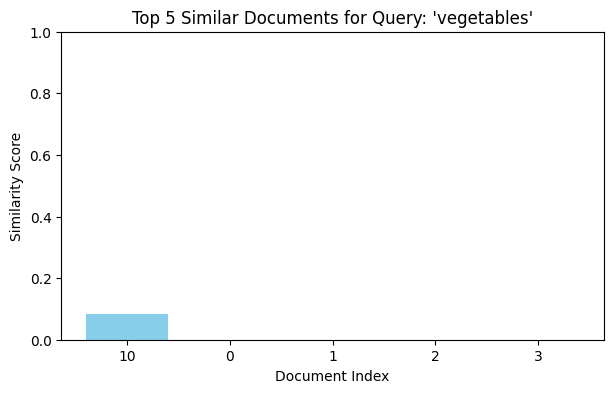


Query: healthy foods in Canada
(10, np.float64(0.609))
Canada's Food Guide is a nutrition guide produced by Health Canada to promote Healthy behaviours and habits, and lifestyles in Canada - this is to increase the number of healthy people in Canada. In 2007, it was reported to be the second most requested Canadian government publication, behind the Income Tax Forms. The Health Canada website states: Food guides are basic education tools that are designed to help people follow a healthy diet. The Guide recommends eating a variety of healthy foods each day including plenty of vegetables and fruits, protein foods, and whole grain foods. It recommends choosing protein foods that come from plants more often. It also recommends limiting highly processed foods. 

(9, np.float64(0.296))
In nutrition, the diet of an organism is the sum of foods it eats, which is largely determined by the availability and palatability of foods. 

(12, np.float64(0.109))
Canadian Industry Statistics (CIS) analy

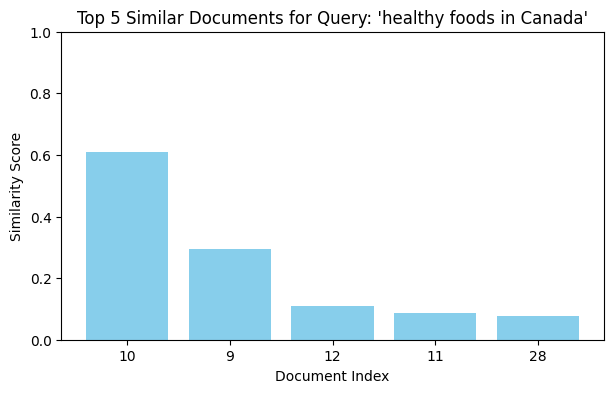

In [11]:
# call the function
rank_documents_tfidf(queries, documents, stop_words="english", top_k=5)

In this experiment, I used the TF-IDF (Term Frequency–Inverse Document Frequency) method to calculate the textual similarity between the three queries (“fruits”, “vegetables”, and “healthy foods in Canada”) and the sample documents.

TF-IDF assigns higher weights to words that are frequent in a document but rare across the corpus, helping highlight terms that best represent each document’s topic. Using cosine similarity, I compared each query vector against all document vectors and ranked the top five most relevant documents.

The results show that documents containing the exact query words (e.g., “fruits”, “vegetables”) achieve the highest similarity scores, while documents without those exact terms receive low or zero scores. This is expected because TF-IDF is a lexical approach — it relies on exact word overlap rather than semantic meaning.

Overall, the TF-IDF method effectively identifies documents with matching keywords but struggles to capture deeper relationships or synonyms (e.g., “nutrition” vs. “healthy”). The visualization bar charts clearly show the ranking patterns for each query.

## Repeat the same task after some preprocessing

Use a minimum of 2 different text cleaning/standardization techniques (e.g. lemmatization, removing punctuation, etc).

In [12]:
# e.g. you can use a lemmatizer to reduce words down to their
# simplest 'lemma' (helpful when dealing with plurals)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# run once if not already done
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')   # <-- add this line
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# Function for preprocessing for tfidf
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_for_tfidf(text):
    # 1. Lowercase the text
    text = text.lower()

    # 2. Remove punctuation and digits
    text = re.sub(r"[^a-z\s]", " ", text)

    # 3. Tokenize
    tokens = word_tokenize(text)

    # 4. Lemmatize and remove stopwords
    clean_tokens = [
        lemmatizer.lemmatize(tok)
        for tok in tokens
        if tok not in stop_words and len(tok) > 2  # remove very short words
    ]

    # 5. Join back into a single string
    return " ".join(clean_tokens)


In [14]:
# Apply it to your documents and queries
clean_documents = [preprocess_for_tfidf(doc) for doc in documents]
clean_queries = [preprocess_for_tfidf(q) for q in queries]


Query: fruit
(29, np.float64(0.464))
fruit dish use fruit primary ingredient condiment prepared fruit primary ingredient also included list 

(6, np.float64(0.256))
botanist fruit entity develops fertilized ovary flower mean tomato squash pumpkin cucumber pepper eggplant corn kernel bean pea pod fruit apple pear peach apricot melon mango 

(0, np.float64(0.16))
fresh pomegranate anushka avni international bhagwa premium pomegranate variety india deep red aril pleasing red rugged skin enhances appearance whilst promoting shelf life fruit bhagwa widely known soft seed dark red color extremely delicious packaging net weight box detail minimum weight maximum weight color aril dark cherry red taste sweet fruit count carton net number packed per carton gm 

(31, np.float64(0.095))
fruit serving bowl round dish container typically used prepare serve food interior bowl characteristically shaped like spherical cap edge bottom forming seamless curve make bowl especially suited holding liquid lo

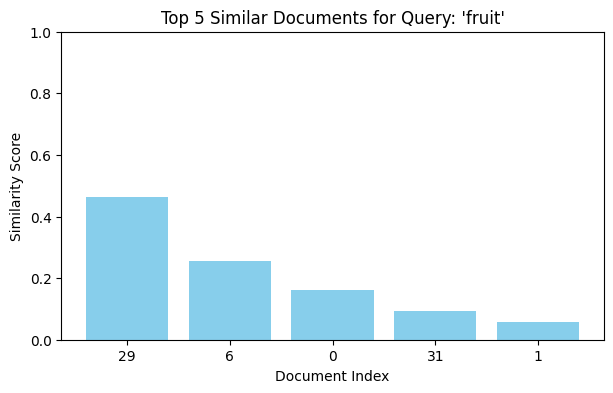


Query: vegetable
(10, np.float64(0.08))
canada food guide nutrition guide produced health canada promote healthy behaviour habit lifestyle canada increase number healthy people canada reported second requested canadian government publication behind income tax form health canada website state food guide basic education tool designed help people follow healthy diet guide recommends eating variety healthy food day including plenty vegetable fruit protein food whole grain food recommends choosing protein food come plant often also recommends limiting highly processed food 

(0, np.float64(0.0))
fresh pomegranate anushka avni international bhagwa premium pomegranate variety india deep red aril pleasing red rugged skin enhances appearance whilst promoting shelf life fruit bhagwa widely known soft seed dark red color extremely delicious packaging net weight box detail minimum weight maximum weight color aril dark cherry red taste sweet fruit count carton net number packed per carton gm 

(1,

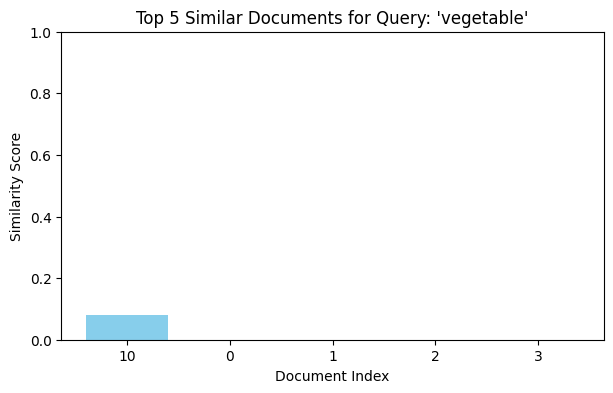


Query: healthy food canada
(10, np.float64(0.639))
canada food guide nutrition guide produced health canada promote healthy behaviour habit lifestyle canada increase number healthy people canada reported second requested canadian government publication behind income tax form health canada website state food guide basic education tool designed help people follow healthy diet guide recommends eating variety healthy food day including plenty vegetable fruit protein food whole grain food recommends choosing protein food come plant often also recommends limiting highly processed food 

(9, np.float64(0.267))
nutrition diet organism sum food eats largely determined availability palatability food 

(31, np.float64(0.125))
fruit serving bowl round dish container typically used prepare serve food interior bowl characteristically shaped like spherical cap edge bottom forming seamless curve make bowl especially suited holding liquid loose food content bowl naturally concentrated center force gra

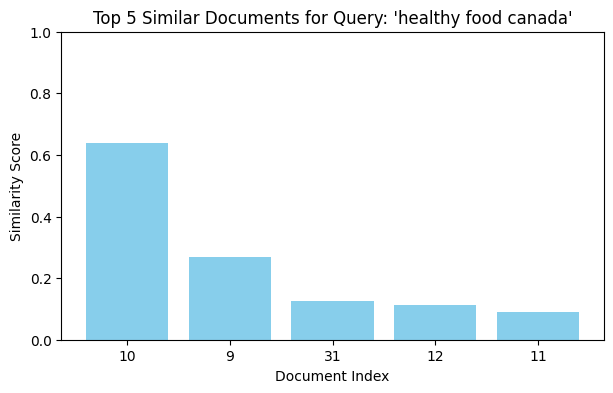

In [15]:
# call the function
rank_documents_tfidf(clean_queries, clean_documents, stop_words="english", top_k=5)

What impact did the text cleaning / preprocessing have on your results?

I cleaned and standardized all text before computing TF-IDF vectors. Each document and query was lowercased, stripped of punctuation and numbers, tokenized, lemmatized using NLTK’s WordNetLemmatizer, and had English stop words removed. Lemmatization ensures that related word forms (e.g., fruits, fruit, fruity) are treated as a single token, reducing noise and vocabulary size. These steps improve the quality of TF-IDF features and make document–query similarity more meaningful.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_tfidf_scores(queries, documents, stop_words="english", top_k=5):
    vectorizer = TfidfVectorizer(stop_words=stop_words)
    tfidf_matrix = vectorizer.fit_transform(queries + documents)

    n_queries = len(queries)
    results = {}

    for i, q in enumerate(queries):
        q_vec = tfidf_matrix[i]
        doc_mat = tfidf_matrix[n_queries:]
        sims = cosine_similarity(q_vec, doc_mat)[0]

        doc_scores = list(enumerate(sims))
        doc_sorted = sorted(doc_scores, key=lambda x: x[1], reverse=True)

        # store top_k (index, score) pairs
        results[q] = doc_sorted[:top_k]

    return results

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comparison(raw_results, clean_results, top_k=5):
    # iterate over both dicts in the same order
    for (raw_query, raw_vals), (clean_query, clean_vals) in zip(raw_results.items(), clean_results.items()):
        # get top-k (index, score) pairs
        raw_indices = [idx for idx, _ in raw_vals[:top_k]]
        raw_scores  = [score for _, score in raw_vals[:top_k]]

        clean_indices = [idx for idx, _ in clean_vals[:top_k]]
        clean_scores  = [score for _, score in clean_vals[:top_k]]

        # x positions
        x = np.arange(top_k)
        width = 0.35

        plt.figure(figsize=(8, 4))
        plt.bar(x - width/2, raw_scores,  width, label="Before cleaning")
        plt.bar(x + width/2, clean_scores, width, label="After cleaning")

        # we can just label as D1..Dk for simplicity
        plt.xticks(x, [f"D{i+1}" for i in range(top_k)])
        plt.ylabel("Similarity score")
        plt.ylim(0, 1)
        plt.title(f"Query:\noriginal = '{raw_query}' | cleaned = '{clean_query}'")
        plt.legend()
        plt.show()


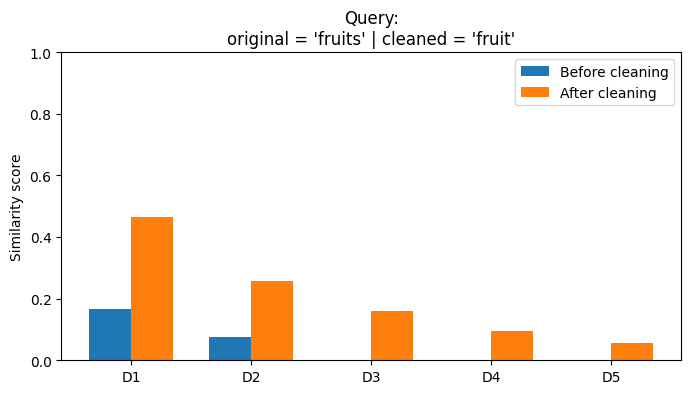

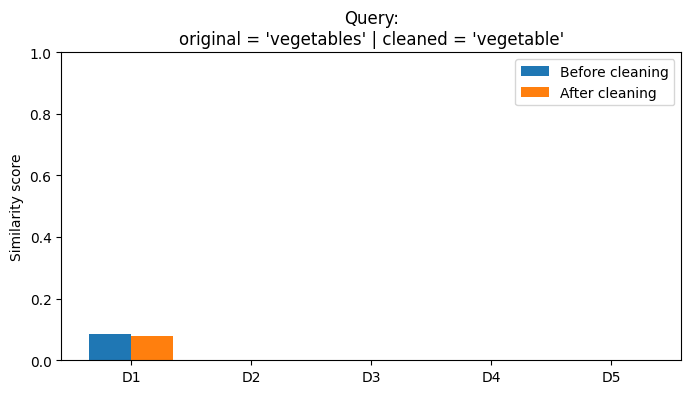

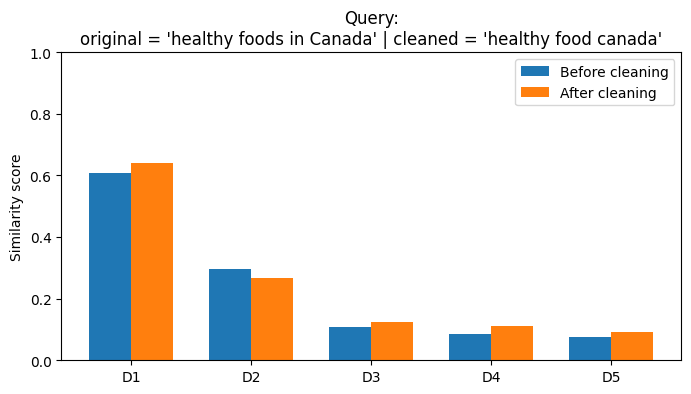

In [18]:
raw_results = get_tfidf_scores(queries, documents, top_k=5)
clean_results = get_tfidf_scores(clean_queries, clean_documents, top_k=5)

plot_comparison(raw_results, clean_results, top_k=5)

# Experiment 2: Semantic matching using GloVe embeddings
***

In [19]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 46.6 MB/s eta 0:00:00


In [20]:
# if you decide to use the gensim library and the sample codes below,
# you would need gensim version >=4.0.1 to be installed
#!pip install  gensim==4.0.1
import gensim
print(gensim.__version__)

4.4.0


In [21]:
import logging
import json
import logging
from re import sub
from multiprocessing import cpu_count

import numpy as np

import gensim.downloader as api
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.similarities import WordEmbeddingSimilarityIndex
from gensim.similarities import SparseTermSimilarityMatrix
from gensim.similarities import SoftCosineSimilarity

In [29]:
# optional, but it helps
#import logging

# Initialize logging.
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.WARNING)

In [30]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#stop_words = 'english'
#print('Using built-in English stop words from scikit-learn')

In [24]:
#def preprocess(doc):
    # Tokenize, clean up input document string
    # doc = sub(r'<img[^<>]+(>|$)', " image_token ", doc)
    # you may decide to add additional steps here
    # return [token for token in simple_preprocess(doc, min_len=0, max_len=float("inf")) if token not in stopwords]

In [25]:
# Load test data
# with open('sample_repository.json') as in_file:
#    repo_data = json.load(in_file)

#titles = [item[0] for item in repo_data['data']]
#documents = [item[1] for item in repo_data['data']]

In [31]:
from sklearn.feature_extraction import text
stopwords = text.ENGLISH_STOP_WORDS

In [32]:
# Download and load the GloVe word vector embeddings
if 'glove' not in locals():  # only load if not already in memory
    glove = api.load("glove-wiki-gigaword-50")

similarity_index = WordEmbeddingSimilarityIndex(glove)

In [35]:
# Verifying what you loaded
glove.most_similar("banana", topn=5)

[('bananas', 0.8152028322219849),
 ('coconut', 0.7872511148452759),
 ('pineapple', 0.7579814791679382),
 ('mango', 0.7556402087211609),
 ('beet', 0.7212650179862976)]

In [ ]:
from nltk.tokenize import word_tokenize
import re

def basic_clean(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    return text

def glove_coverage(texts, glove_model):
    total_tokens = 0
    found_tokens = 0
    missing_tokens = set()

    for text in texts:
        text = basic_clean(text)
        tokens = word_tokenize(text)

        for tok in tokens:
            total_tokens += 1
            if tok in glove_model:
                found_tokens += 1
            else:
                missing_tokens.add(tok)

    coverage = found_tokens / total_tokens * 100
    print(f"Vocabulary coverage: {coverage:.2f}% ({found_tokens}/{total_tokens})")
    print(f"Unique missing tokens (sample): {list(missing_tokens)[:20]}")


In [36]:
# this will unpack the json file contents into a list of titles and documents
with open('sample_repository.json') as in_file:
    repo_data = json.load(in_file)

titles = [item[0] for item in repo_data['data']]
documents = [item[1] for item in repo_data['data']]

For the GloVe experiment, I applied lighter text preprocessing compared to TF-IDF. I lowercased all text, removed punctuation and digits, and optionally removed English stopwords. Lemmatization was skipped because GloVe embeddings are pre-trained on raw token forms and rely on exact word matches within their vocabulary.

In [27]:
#query_s = 'Your queries here'

# Preprocess the documents, including the query string
#corpus = [preprocess(document) for document in documents]
#query = preprocess(query_s)

In [ ]:
# Build the term dictionary, TF-idf model
# Keep in mind that the search query must be in the dictionary as well, in case the terms do not overlap with the documents
#dictionary = Dictionary(corpus+[query])
#tfidf = TfidfModel(dictionary=dictionary)

# Create the term similarity matrix.
# The nonzero_limit enforces sparsity by limiting the number of non-zero terms in each column.
# In my case, I got best results by removing the default value of 100
# similarity_matrix = SparseTermSimilarityMatrix(similarity_index, dictionary, tfidf)  # , nonzero_limit=None)

In [ ]:
# Compute similarity measure between the query and the documents.
# query_tf = tfidf[dictionary.doc2bow(query)]

#index = SoftCosineSimilarity(
#            tfidf[[dictionary.doc2bow(document) for document in corpus]],
#            similarity_matrix)
#
#doc_similarity_scores = index[query_tf]

In [ ]:
# for each query, output the similarity scores for the top 5 documents with
# th highest score, and interpret your results

# Experiment 3: BERT Model
***
Use a BERT model obtain sentence embeddings and calculate the similarity between queries and documents.

> Hint: see the Module 07 jupyter notebook for examples of how to work with BERT.

In [ ]:
# for each query, output the similarity scores for the top 5 documents with
# th highest score, and interpret your results

 # Technique Comparison
 ***

Compare all three techniques and interpret your findings. Do your best to explain the differences you observe in terms of concepts learned in class (not just the what, but also the how and why one technique produces different results from another).
